## 9. Diagrama de Pareto
El Diagrama de Pareto es una herramienta de análisis fundamental para la mejora de procesos, ya que permite identificar y priorizar los problemas más significativos dentro de un conjunto de causas.  Su utilidad para analizar los datos de fallas se basa en el principio 80/20: nos ayudará a visualizar rápidamente cuáles son las "pocas causas vitales" que originan la mayoría de las fallas (aproximadamente el 80% de los problemas). Al combinar un gráfico de barras (que ordena las fallas de mayor a menor frecuencia) con una línea de porcentaje acumulado, el diagrama de Pareto nos señalará de forma clara en qué tipo de falla (por ejemplo, "Desalineación mecánica" o "Sobrecalentamiento") debemos enfocar los recursos y esfuerzos para lograr el mayor impacto en la reducción de paros del proceso.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# --- 1. Cargar los Datos ---
df_fallas = pd.read_csv(r'D:\TASKS-NALA\master-tasks\Estadistica Aplicada\Parcial01\tarea01\CommonFaults.csv')
print(df_fallas.head())

# --- 2. Procesar los Datos para el Diagrama de Pareto ---
# Contar la frecuencia de cada causa de falla. Esta es la operación clave.
df_pareto = df_fallas['Causa de falla'].value_counts().reset_index()
df_pareto.columns = ['Causa de falla', 'Frecuencia']

# Ordenar el DataFrame por frecuencia en orden descendente
df_pareto = df_pareto.sort_values(by='Frecuencia', ascending=False)

# Calcular el porcentaje acumulado
df_pareto['Porcentaje Acumulado'] = (df_pareto['Frecuencia'].cumsum() / df_pareto['Frecuencia'].sum()) * 100

print( "\n \n Tabla de Frecuencias para el Diagrama de Pareto:")
print(df_pareto)

   Registro          Causa de falla
0         1      Vibración excesiva
1         2      Sobrecalentamiento
2         3  Herramienta desgastada
3         4      Vibración excesiva
4         5  Herramienta desgastada

 
 Tabla de Frecuencias para el Diagrama de Pareto:
             Causa de falla  Frecuencia  Porcentaje Acumulado
0    Desalineación mecánica          28             23.333333
1        Sobrecalentamiento          22             41.666667
2           Fallo eléctrico          18             56.666667
3        Vibración excesiva          16             70.000000
4    Lubricación deficiente          12             80.000000
5   Contaminación ambiental           9             87.500000
6              Error humano           7             93.333333
7    Herramienta desgastada           5             97.500000
8  Software mal configurado           3            100.000000


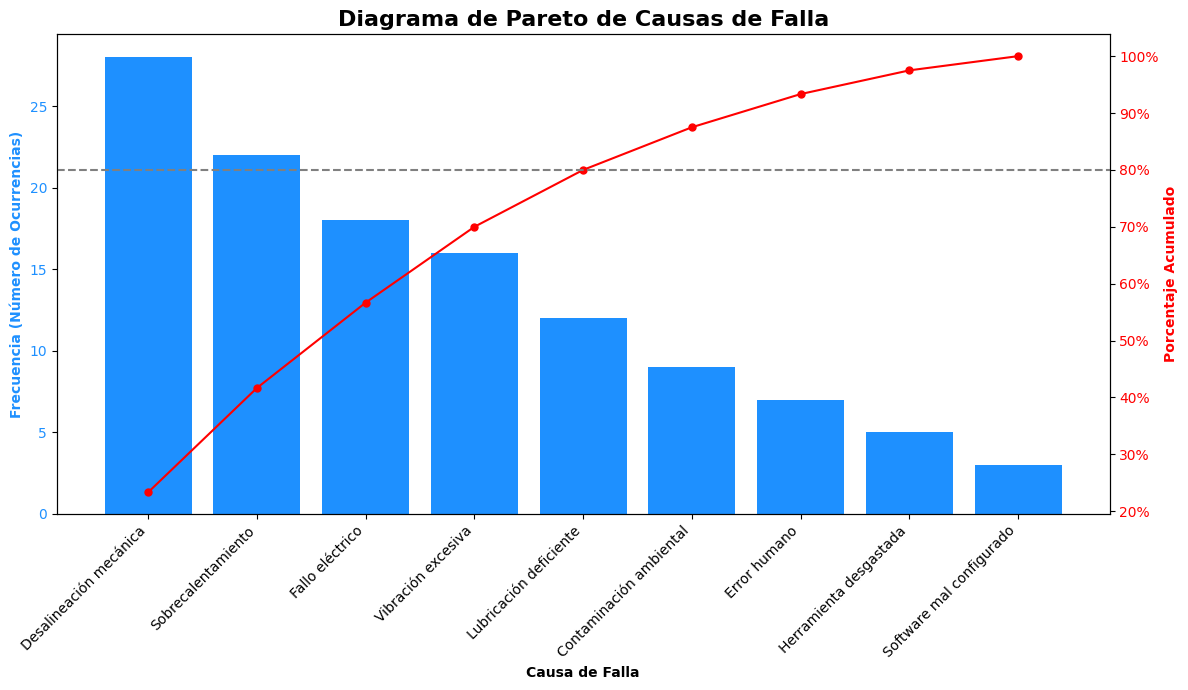

In [6]:
# --- 3. Generar el Diagrama de Pareto ---
# Crear la figura y el eje principal para las barras
fig, ax1 = plt.subplots(figsize=(12, 7))

# Graficar las barras de frecuencia
ax1.bar(df_pareto['Causa de falla'], df_pareto['Frecuencia'], color='dodgerblue', label='Frecuencia de Fallas')
ax1.set_xlabel('Causa de Falla', fontweight='bold')
ax1.set_ylabel('Frecuencia (Número de Ocurrencias)', fontweight='bold', color='dodgerblue')
ax1.tick_params(axis='y', labelcolor='dodgerblue')
plt.xticks(rotation=45, ha="right") # Rotar las etiquetas del eje X para mejor legibilidad

# Crear un segundo eje Y que comparta el mismo eje X para la línea de porcentaje
ax2 = ax1.twinx()
ax2.plot(df_pareto['Causa de falla'], df_pareto['Porcentaje Acumulado'], color='red', marker='o', ms=5, label='Porcentaje Acumulado')
ax2.set_ylabel('Porcentaje Acumulado', fontweight='bold', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Formatear el eje del porcentaje para que muestre el símbolo '%'
ax2.yaxis.set_major_formatter(PercentFormatter())

# Añadir una línea en el 80% para marcar el principio de Pareto
ax2.axhline(80, color="gray", linestyle="--")

# Título y diseño final
plt.title('Diagrama de Pareto de Causas de Falla', fontsize=16, fontweight='bold')
fig.tight_layout() # Ajusta el gráfico para evitar que las etiquetas se corten
plt.show()



## 10. Diagrama de Pastel
El Diagrama de Pastel (o gráfica circular) es una herramienta visual efectiva para mostrar la proporción de cada categoría con respecto al total.  Para los datos de fallas recolectados, su principal utilidad será comunicar de manera instantánea y sencilla qué porcentaje del total de fallas corresponde a cada causa específica. Por ejemplo, un diagrama de pastel nos permitiría ver de un vistazo si el "Fallo eléctrico" representa un 15%, 25% o 50% de todos los incidentes registrados. Es ideal para presentar a una audiencia general una composición clara del problema, destacando las contribuciones relativas de cada tipo de falla al número total de eventos.


--- Generando Diagrama de Pastel ---


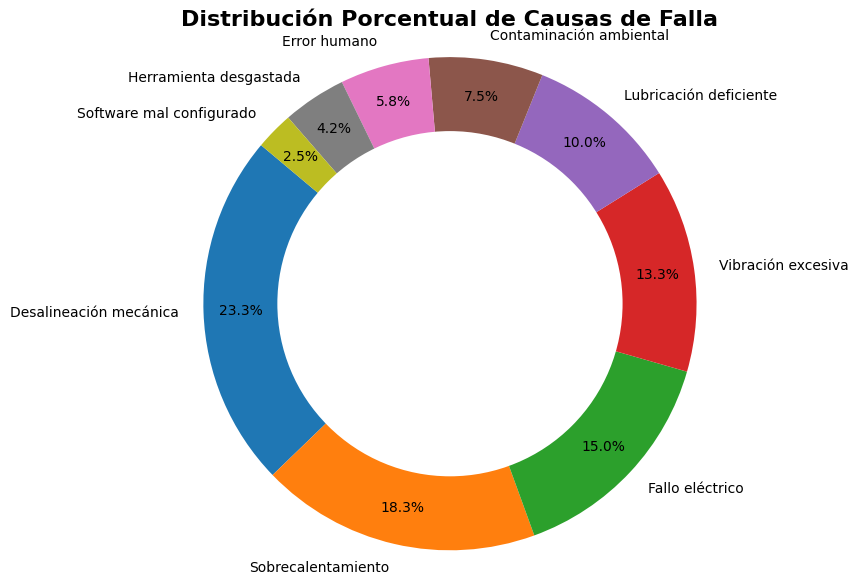

In [8]:
# --- 4. Generar el Diagrama de Pastel ---
print("\n--- Generando Diagrama de Pastel ---")

# Crear la figura para el diagrama de pastel
plt.figure(figsize=(7, 7))

# Graficar el diagrama de pastel
# 
plt.pie(df_pareto['Frecuencia'], 
        labels=df_pareto['Causa de falla'], 
        autopct='%1.1f%%', # Formato para mostrar porcentajes
        startangle=140,    # Angulo de inicio para una mejor visualización
        pctdistance=0.85)  # Distancia de los porcentajes desde el centro

# Añadir un círculo en el centro para hacerlo un 'doughnut chart', que es más legible
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Asegurar que el pastel se dibuje como un círculo.
plt.axis('equal')  

plt.title('Distribución Porcentual de Causas de Falla', fontsize=16, fontweight='bold')
plt.show()

